# Investigating Baseball Batting Data Set

In this project, I investigated the baseball data set by Sean Lahman. Due to the extensive data contained in this data set, I have focused on the batting-related data. Specifically, I have focused on the Batting data set as well as the Salary data set. More concretely, with these two data sets in minds, I seek to explore the following:

- Do the traditional statistical measures such as batting averages agree or conflict with Sabermetrics measures such as OBP? What is the relationship between different performance metrics? Do they have a strong negative or positive relationship?

- What are the characteristics of baseball players that fall into 80% above and below the means of these metrics?

- Can we identify players with solid numbers but are underpaid? 


## Performance Metrics of Baseball: Traditional Measures v. Sabermetrics

I have chosen to investigate the baseball data set so that I can put into practice the skills I have learned to research, explore and develop my intuition about a data set. Personally, I am not familiar with baseball, nor have I had any prior knowledge of baseball. As a result, I have performed some research on some performance metrics on baseball.

Since the flow of a baseball game has natural breaks to it, and normally players act individually rather than performing in clusters, the sport lends itself to easy record-keeping and statistics. Traditionally, statistics such as batting average for the battor (the number of hits divided by the number of at bats) and earned run average for the pitcher (the average number of earned runs allowed by a pitcher per nine innings) have dominated attention in the statistical world of baseball. 

However, the recent advent of sabermetrics has created statistics drawing from a greater breadth of player performance measures and playing field variables. Sabermetrics and comparative statistics attempt to provide an improved measure of a player's performance and contributions to his team from year to year, frequently against a statistical performance average.

Some sabermetric statistics have entered the mainstream baseball world that measure a batter's overall performance including on-base plus slugging, commonly referred to as OPS. OPS adds the hitter's on-base percentage (number of times reached base by any means divided by total plate appearances) to his slugging percentage (total bases divided by at-bats).

Definitions of these performance metrics are lised below for reference:

$$Batting average = \frac{Hits}{At Base}$$

$$OPS = OBP + SLG$$

where $$OPS = \frac{H+BB+HBP}{AB+BB+SF+HBP}$$

and 

$$SLG = \frac{1B+(2\times2B)+(3\times3B)+(4\times4B)}{AB}$$

Further, $H$ denotes hites, $BB$ denotes Base on base on balls, $HBP$ denotes Hit by pitch, $AB$ denotes at base, and $SF$ denotes Sacrifice flies.

### Read in data and process

Although the data could be read in without using a function, I have refactored the code to do so. This function takes two inputs: a list of data file, and a key with which to join the data files in the list, and returns a Pandas data freame. The **join** operation is a SQL-style inner join. This ensures that only those rows with the specified key that can be found across all data files are included in the output file, which is the Pandas data frame we can mentioned earlier.

This function, *read_and_merge_data(...)*, along with other functions, are provided to both refactor the code as well as to facilitate future re-use of code.

*read_and_mege* function is one that takes in a list of data files, merge them using a list of keys, and output just one data frame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_and_merge_data(data_list, key_list):
    dir = 'C:/Users/Jenny/Documents/Mathfreak_Data/School/Data_Analysis_ND/Project2/baseballdatabank-master/core/'
    #dir = '../baseballdatabank-master/core/'
    out_file = []
    for file in data_list:
        out = pd.read_csv(dir+file)
        out_file.append(out)

    start = out_file[0]
    for i in range(len(out_file)):
        if i < len(out_file)-1:
            merged = start.merge(out_file[i+1], on=key_list, how='inner')
            start = merged

    return merged

In [3]:
def clean_data(data):
    data.dropna(inplace=True)
    return data

In [4]:
def get_correlation(series1, series2):
    return series1.corr(series2, method='pearson')

In [5]:
ans = read_and_merge_data(['Batting.csv', 'Salaries.csv'], key_list=['playerID','yearID'])
df = clean_data(ans)

In [6]:
df.head()

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,teamID_y,lgID_y,salary
1,agostju01,1985,1,CHA,AL,54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHA,AL,147500
2,aguaylu01,1985,1,PHI,NL,91,165.0,27.0,46.0,7.0,...,22.0,26.0,5.0,6.0,4.0,3.0,7.0,PHI,NL,237000
4,allenne01,1985,1,SLN,NL,23,2.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,SLN,NL,750000
6,almonbi01,1985,1,PIT,NL,88,244.0,33.0,66.0,17.0,...,22.0,61.0,0.0,1.0,4.0,3.0,6.0,PIT,NL,255000
7,anderla02,1985,1,PHI,NL,57,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,PHI,NL,250500


### Process and wrangle data based on playerID only

After we have succesfully read in the data, it is time for us to add the columns that reflect the performance metrics that  have defined above. Specially, we need to compute the batting average, OBP, SLG, and OPS. 

Refactoring of code had been considered but due to the fact that the precise calculate is different for each performance metrics, I have decided to leave these computations out of a function for now.

In [7]:
df['Bat_avg'] = df['H']/df['AB']
df['OBP'] = (df['H']+df['BB']+df['HBP']) \
            /(df['AB']+df['BB']+df['SF']+df['HBP'])
df['SLG'] = (df['H']+df['2B']+2*df['3B']+3*df['HR']-df['IBB'])/(df['AB'])
df['OPS'] = df['OBP'] + df['SLG']

In [8]:
df.head()

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,SH,SF,GIDP,teamID_y,lgID_y,salary,Bat_avg,OBP,SLG,OPS
1,agostju01,1985,1,CHA,AL,54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,CHA,AL,147500,NaN,NaN,NaN,NaN
2,aguaylu01,1985,1,PHI,NL,91,165.0,27.0,46.0,7.0,...,4.0,3.0,7.0,PHI,NL,237000,0.278788,0.377551,0.436364,0.813915
4,allenne01,1985,1,SLN,NL,23,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,SLN,NL,750000,0.000000,0.000000,0.000000,0.000000
6,almonbi01,1985,1,PIT,NL,88,244.0,33.0,66.0,17.0,...,4.0,3.0,6.0,PIT,NL,255000,0.270492,0.329630,0.413934,0.743564
7,anderla02,1985,1,PHI,NL,57,4.0,1.0,0.0,0.0,...,1.0,0.0,0.0,PHI,NL,250500,0.000000,0.000000,0.000000,0.000000


### Now we can explore the data: correlation 

We are now in a position to look into the correaltion of certain of the metrics.

We first compute the Pearson's correlation coefficients between the following pairs of variables: batting average and OPS, between OPS and salary, and batting average and salary. From the computational results below, we see that there is a high correlation between the batting average (which is part of a traditional performance metrics) and the OPS (one exmaple of Sabermetrics). 

Further, we also see that there is a higher correlation between OPS and salary than that of batting average and salary. However, we should also point out that the correlation are low between these metrics and salary.

In [9]:
cor1 = get_correlation(df['Bat_avg'], df['OPS'])
print(cor1)

0.940940252391


In [10]:
cor4 = get_correlation(df['OPS'], df['salary'])
print(cor4)

0.0849516769148


In [11]:
cor6 = get_correlation(df['Bat_avg'], df['salary'])
print(cor6)

0.0555485082607


The following code chunk computes the correlation matrixs between all of the performance matrics -- including all the raw metrics provided in the *Batting.csv* file, as well as the computed metrics we have put in earlier.

Typically, in the correlation matrix, when a negative element in the matrix is observed, it means that there is a negative relationship between the two variables. Namely, when one varialbe increases, the other variable decreases. **However**, a close inspection of the correlation matrix showed that **there is a positive correlation between all pairs of variables, except for yearID and stint number**. 

In [12]:
df.corr()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,IBB,HBP,SH,SF,GIDP,salary,Bat_avg,OBP,SLG,OPS
yearID,1.000000,0.028217,-0.071213,-0.082089,-0.075605,-0.078790,-0.041395,-0.084703,-0.027376,-0.068997,...,-0.090061,0.039053,-0.114529,-0.084857,-0.059116,0.342983,-0.057953,-0.060240,-0.034583,-0.049567
stint,0.028217,1.000000,-0.247791,-0.169659,-0.154623,-0.161371,-0.155683,-0.101518,-0.123229,-0.149458,...,-0.102061,-0.109656,-0.113881,-0.128987,-0.144699,0.005781,-0.009991,-0.007936,-0.000294,-0.004317
G,-0.071213,-0.247791,1.000000,0.925726,0.889050,0.914030,0.875546,0.609272,0.734286,0.861416,...,0.559811,0.604982,0.192713,0.744299,0.798398,0.143405,0.405666,0.413256,0.457635,0.468112
AB,-0.082089,-0.169659,0.925726,1.000000,0.962304,0.989669,0.947221,0.659016,0.793104,0.929059,...,0.586822,0.650366,0.227885,0.800319,0.863930,0.192163,0.446556,0.445983,0.503990,0.513642
R,-0.075605,-0.154623,0.889050,0.962304,1.000000,0.972548,0.937214,0.668325,0.844474,0.937162,...,0.613753,0.659192,0.172682,0.780288,0.807538,0.215506,0.439069,0.451497,0.516464,0.522704
H,-0.078790,-0.161371,0.914030,0.989669,0.972548,1.000000,0.957452,0.665489,0.799681,0.937165,...,0.606528,0.645609,0.195962,0.800391,0.859957,0.200717,0.465230,0.458579,0.518112,0.527295
2B,-0.041395,-0.155683,0.875546,0.947221,0.937214,0.957452,1.000000,0.597135,0.795590,0.922428,...,0.595794,0.640156,0.141911,0.787439,0.832308,0.206904,0.440383,0.438052,0.516037,0.516445
3B,-0.084703,-0.101518,0.609272,0.659016,0.668325,0.665489,0.597135,1.000000,0.402712,0.540141,...,0.312944,0.387832,0.244741,0.472271,0.458485,0.031206,0.291603,0.278086,0.315357,0.320444
HR,-0.027376,-0.123229,0.734286,0.793104,0.844474,0.799681,0.795590,0.402712,1.000000,0.925945,...,0.652855,0.586544,-0.056692,0.697157,0.705228,0.266467,0.342020,0.365217,0.503460,0.474711
RBI,-0.068997,-0.149458,0.861416,0.929059,0.937162,0.937165,0.922428,0.540141,0.925945,1.000000,...,0.664066,0.633428,0.064614,0.825261,0.836840,0.241474,0.422609,0.431181,0.531263,0.522421


The above correlation matrix is not particularly easy to read. However, having this matrix facilitates us to draw the correlation graph, shown in the heat map below. 

Note that mathematically, Pearson's correlation is bounded between $[-1, 1]$. In the heat map, th darker the color, the higher positive is the correlation between the pair of variables. Here, we get a visual confirmation of our computation ealrier where we established that there is a high correlation between the batting average and OPS. Also, from the heat map, we also see that there is a very high correlation between computed performance metrics such as OPS and OBS, or OPS and SLG. Such a high correlation is embedded in the way OPS is defined (called that $OPS = OCS + SLG$). 

Similarly, we also get a visual confirmation between the metrics (such as yearID and stint) with all other provided metrics. This also makes sense upon a moment's reflection, since the year a player plays in should bare no direct correlation between the metrics (more specidiclly, why should the number 2005, which is the year, have a bearing on the player's performance metrics?). 


Populating the interactive namespace from numpy and matplotlib


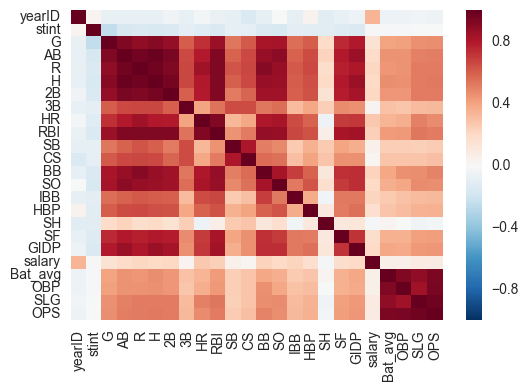

In [13]:
%pylab inline
corr = df.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

We now plotted the scatter plot between batting average and salaries. Due to the extreme imbalance between the magnitude of the axes, the scatter plot between batting average and salary is not very clear. We then use some data transformation techniques by plotting the scatter plot on the log scale - for y-axis only. This is because many of the data points have batting average equal to $0$, which prevents us from transfroming the x-values. 

On the scatter plot with y-axis transformed on a log-scale, we see that most of salaries fall around the neighborhood of $OPS \approx 0.2$. As the OPS increases, the salary data points starts to decrese. 

One interesting feature of the scatter plot below is that there are several salary points **stacked vertically** around $0$ and $0.5$. Keep in mind that this visual feature is an artifact of the data set, where there are quite a few players with batting average at level $0$ and $0.5$. 

Populating the interactive namespace from numpy and matplotlib


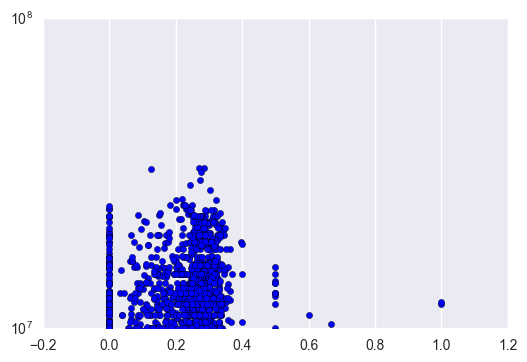

In [14]:
%pylab inline
plt.figure()
ax = plt.gca()
plt.scatter(df['Bat_avg'], df['salary'])
ax.set_yscale('log')
plt.show()

In [15]:
df['Bat_avg'].mean()

0.21112371614300726

Similarly, due to the extreme imbalance between the magnitude of the axes, the scatter plot between OPS and salary is not very clear. We then use some data transformation techniques by plotting the scatter plot on the log scale - for y-axis only. This is because many of the data points have OPS equal to $0$, which prevents us from transfroming the x-values. 

On the scatter plot with y-axis transformed on a log-scale, we see that most of salaries fall around the neighborhood of $OPS \approx 0.6$. As the OPS increases, the salary data points starts to decrese. 

One interesting feature of the scatter plot below is that there are several salary points **stacked vertically** at $0$Keep in mind that this visual feature is an artifact of the data set, where there are quite a few players with OPS at level $0$. 

Populating the interactive namespace from numpy and matplotlib


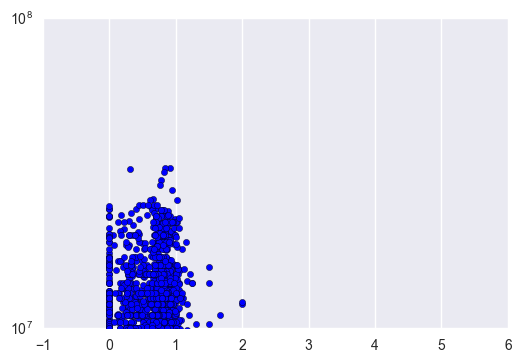

In [16]:
%pylab inline
plt.figure()
ax = plt.gca()
plt.scatter(df['OPS'], df['salary'])
ax.set_yscale('log')
plt.show()

In [17]:
df['OPS'].mean()

0.5777654672964035

### Data exploration continued: distributions of salary

To explore the distributions of salary distributions visually, we plot the histogram of salary below. 

However, from below, we see that the salary histogram is right skewed with a very long tail. One problem is that this graph may not have clearly presented the patterns in the salary distribution well.

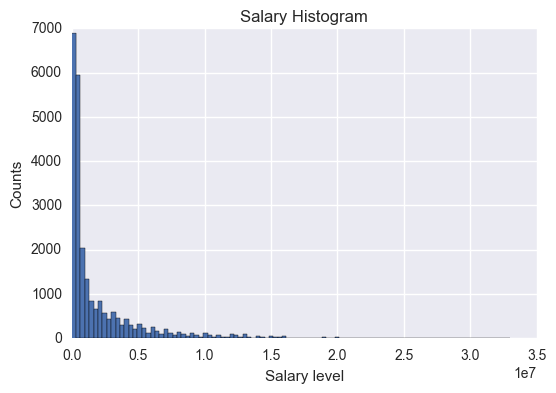

In [18]:
plt.subplots()
plt.hist(df['salary'].dropna(), bins=100)
plt.title("Salary Histogram")
plt.xlabel("Salary level")
plt.ylabel("Counts")
plt.show()

As alluded above, the salary histogram on a non-transform basis may not have presented the salary patterns well. To investigate if there is indeed a pattern that we have missed in the graph above, we now plot the salary histogram on a log scale.

Once plotted on a log scale, we can see the distribution much clearer. We note that the counts within each bin decreases at a linear rate on the log scale - this means that at the actual scale (before the log transformation), the counts demonstrated a pattern of exponential decay: there is overwhelming number of players with a salary below $500,000$. We know that since there are $20$ bins between $1,000,000$ and $5,000,000$.

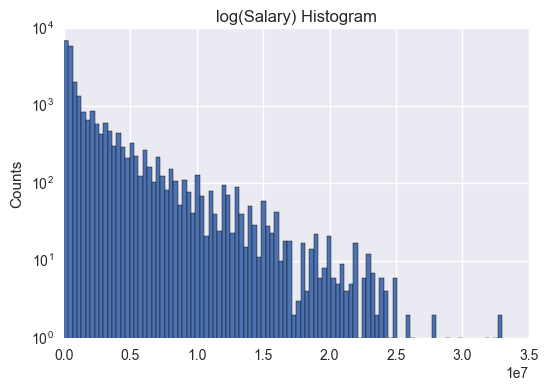

In [19]:
plt.subplots()
ax = plt.gca()
plt.hist(df['salary'].dropna(), bins=100)
plt.title("log(Salary) Histogram")
ax.set_yscale('log')
plt.ylabel("Counts")
plt.show()

We now plot the OPS, AB (At Bats), and HR (Home Run) on a basis of log-transformation of the y-axis. 

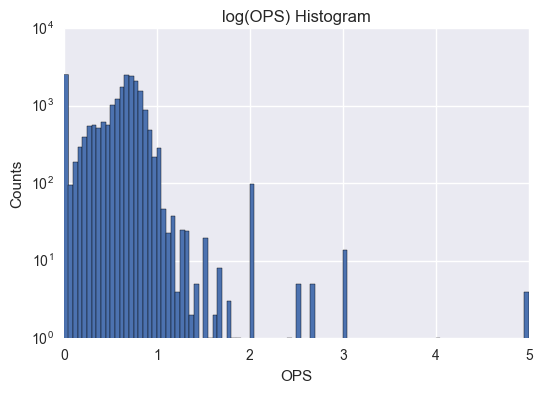

In [20]:
plt.subplots()
ax = plt.gca()
plt.hist(df['OPS'].dropna(), bins=100)
plt.title("log(OPS) Histogram")
plt.xlabel("OPS")
plt.ylabel("Counts")
ax.set_yscale('log')
plt.show()

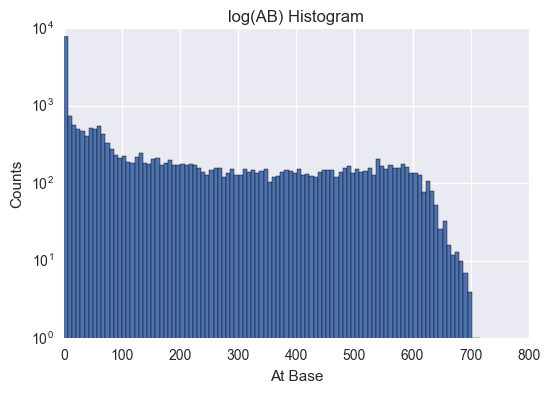

In [21]:
plt.subplots()
ax = plt.gca()
plt.hist(df['AB'], bins=100)
plt.title("log(AB) Histogram")
plt.xlabel("At Base")
plt.ylabel("Counts")
ax.set_yscale('log')
plt.show()

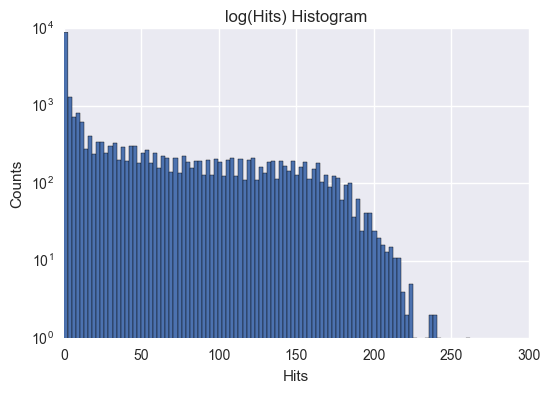

In [22]:
plt.subplots()
ax = plt.gca()
plt.hist(df['H'], bins=100)
plt.title("log(Hits) Histogram")
plt.xlabel("Hits")
plt.ylabel("Counts")
ax.set_yscale('log')
plt.show()

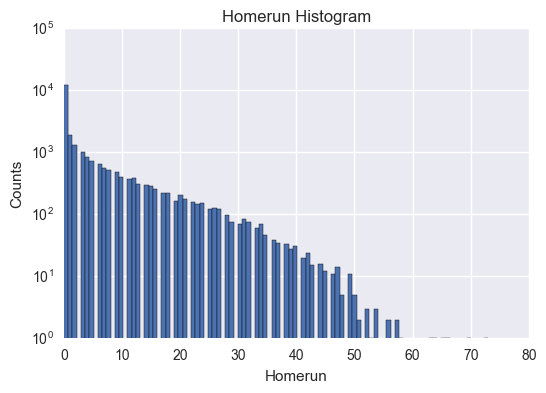

In [23]:
plt.subplots()
ax = plt.gca()
plt.hist(df['HR'], bins=100)
plt.title("Homerun Histogram")
plt.xlabel("Homerun")
plt.ylabel("Counts")
ax.set_yscale('log')
plt.show()

### Remove the extreme outliers

Given the skewed distribution of salary (along with other metrics), we now examine the salary distribution after removing the extreme outliers. Here, we used the $z$-score of $1.03$, on the basis that we would like to trim the player's salary when it is at the top or bottom $15%$ in absolute dollars. Here, we have used th $z$-score since we have all the major league baseball players reported in the Sean Lahman baseball database. In other words, $z$-score, rather thatn $t$-score is the proper statistic to use because we are dealing with the population, rather than a sample.

In the following code chuncks, we proceed to use this rationale and approach to remove the outliers for salary, batting average, and OPS. This is so that we can further analyze the relationship between these factors without the impact of outliers in a later section.

In [24]:
from scipy import stats
salaries_no_outliers = df[(np.abs(stats.zscore(df['salary'])) < 1.03)]
salaries_no_outliers.head()

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,SH,SF,GIDP,teamID_y,lgID_y,salary,Bat_avg,OBP,SLG,OPS
1,agostju01,1985,1,CHA,AL,54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,CHA,AL,147500,NaN,NaN,NaN,NaN
2,aguaylu01,1985,1,PHI,NL,91,165.0,27.0,46.0,7.0,...,4.0,3.0,7.0,PHI,NL,237000,0.278788,0.377551,0.436364,0.813915
4,allenne01,1985,1,SLN,NL,23,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,SLN,NL,750000,0.000000,0.000000,0.000000,0.000000
6,almonbi01,1985,1,PIT,NL,88,244.0,33.0,66.0,17.0,...,4.0,3.0,6.0,PIT,NL,255000,0.270492,0.329630,0.413934,0.743564
7,anderla02,1985,1,PHI,NL,57,4.0,1.0,0.0,0.0,...,1.0,0.0,0.0,PHI,NL,250500,0.000000,0.000000,0.000000,0.000000


In [25]:
batavg_no_outliers = df.dropna()[(np.abs(stats.zscore(df['Bat_avg'].dropna()) < 1.03))]
batavg_no_outliers.head()

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,SH,SF,GIDP,teamID_y,lgID_y,salary,Bat_avg,OBP,SLG,OPS
2,aguaylu01,1985,1,PHI,NL,91,165.0,27.0,46.0,7.0,...,4.0,3.0,7.0,PHI,NL,237000,0.278788,0.377551,0.436364,0.813915
4,allenne01,1985,1,SLN,NL,23,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,SLN,NL,750000,0.000000,0.000000,0.000000,0.000000
6,almonbi01,1985,1,PIT,NL,88,244.0,33.0,66.0,17.0,...,4.0,3.0,6.0,PIT,NL,255000,0.270492,0.329630,0.413934,0.743564
7,anderla02,1985,1,PHI,NL,57,4.0,1.0,0.0,0.0,...,1.0,0.0,0.0,PHI,NL,250500,0.000000,0.000000,0.000000,0.000000
8,andujjo01,1985,1,SLN,NL,38,94.0,2.0,10.0,2.0,...,7.0,0.0,2.0,SLN,NL,1030000,0.106383,0.151515,0.127660,0.279175


In [26]:
ops_no_outliers = df.dropna()[(np.abs(stats.zscore(df['OPS'].dropna()) < 1.03))]
ops_no_outliers.head()

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,SH,SF,GIDP,teamID_y,lgID_y,salary,Bat_avg,OBP,SLG,OPS
2,aguaylu01,1985,1,PHI,NL,91,165.0,27.0,46.0,7.0,...,4.0,3.0,7.0,PHI,NL,237000,0.278788,0.377551,0.436364,0.813915
4,allenne01,1985,1,SLN,NL,23,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,SLN,NL,750000,0.000000,0.000000,0.000000,0.000000
6,almonbi01,1985,1,PIT,NL,88,244.0,33.0,66.0,17.0,...,4.0,3.0,6.0,PIT,NL,255000,0.270492,0.329630,0.413934,0.743564
7,anderla02,1985,1,PHI,NL,57,4.0,1.0,0.0,0.0,...,1.0,0.0,0.0,PHI,NL,250500,0.000000,0.000000,0.000000,0.000000
8,andujjo01,1985,1,SLN,NL,38,94.0,2.0,10.0,2.0,...,7.0,0.0,2.0,SLN,NL,1030000,0.106383,0.151515,0.127660,0.279175


In [27]:
df.head()

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,SH,SF,GIDP,teamID_y,lgID_y,salary,Bat_avg,OBP,SLG,OPS
1,agostju01,1985,1,CHA,AL,54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,CHA,AL,147500,NaN,NaN,NaN,NaN
2,aguaylu01,1985,1,PHI,NL,91,165.0,27.0,46.0,7.0,...,4.0,3.0,7.0,PHI,NL,237000,0.278788,0.377551,0.436364,0.813915
4,allenne01,1985,1,SLN,NL,23,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,SLN,NL,750000,0.000000,0.000000,0.000000,0.000000
6,almonbi01,1985,1,PIT,NL,88,244.0,33.0,66.0,17.0,...,4.0,3.0,6.0,PIT,NL,255000,0.270492,0.329630,0.413934,0.743564
7,anderla02,1985,1,PHI,NL,57,4.0,1.0,0.0,0.0,...,1.0,0.0,0.0,PHI,NL,250500,0.000000,0.000000,0.000000,0.000000


### Now we can investigate the distributions without the effect of outliers

We now investigate the distribution of salary, batting average, and OPS after removing the outliers.
 
Visually, now it is a lot easier to see that most of the players have a salary below $500,000$. The numner of players having a salary above $500,000$ decreases on an exponential basis. 

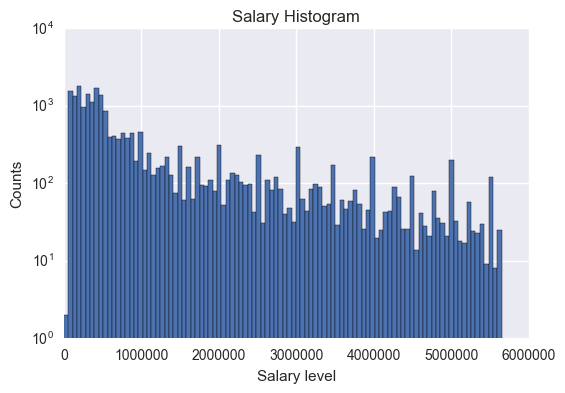

In [28]:
plt.subplots()
ax = plt.gca()
plt.hist(salaries_no_outliers['salary'], bins=100)
plt.title("Salary Histogram")
plt.xlabel("Salary level")
plt.ylabel("Counts")
ax.set_yscale('log')
plt.show()

We see that a majority of players have a batting average between $0.25$ and $0.30$ based on the histogram on a log basis.

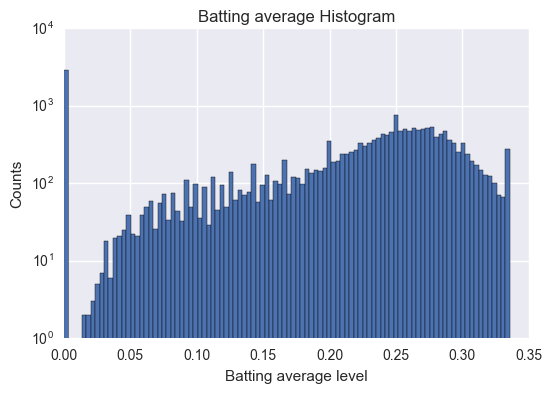

In [29]:
plt.subplots()
ax = plt.gca()
plt.hist(batavg_no_outliers['Bat_avg'], bins=100)
plt.title("Batting average Histogram")
plt.xlabel("Batting average level")
plt.ylabel("Counts")
ax.set_yscale('log')
plt.show()

In [30]:
batavg_no_outliers['Bat_avg'].mean()

0.20050526639546487

We see that a majority of players have a OPS between $0.60$ and $0.80$ based on the histogram on a log basis.

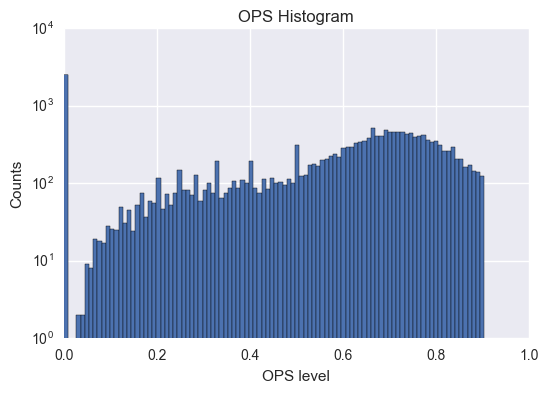

In [31]:
plt.subplots()
ax = plt.gca()
plt.hist(ops_no_outliers['OPS'], bins=100)
plt.title("OPS Histogram")
plt.xlabel("OPS level")
plt.ylabel("Counts")
ax.set_yscale('log')
plt.show()

## Some insights from the data



A few insights we obtained are:

- From the above data exploration, we see some indication that the performance measure such as OPS, used by Sabermetrics, shows a higher correlation with players' salary, compared to batting average. 

- We see indication of low to moderate level of correlation betweene a single performance metric and a player's salary. However, what our data exploration did **not** conclusively ruled out is whether or not there exists a collection of performance measures, either traditional or Sabemetrics, that will correlate at a high level with a player's salary.


## Further questions 

Before we leave this data set, we revisted the questions we had for ourselves before we started:

- Do the traditional statistical measures such as batting averages agree or conflict with Sabermetrics measures such as OBP? What is the relationship between different performance metrics? Do they have a strong negative or positive relationship?

- What are the characteristics of baseball players that fall into 80% above and below the means of these metrics?

- Can we identify players with solid numbers but are underpaid? 

We see that the only question we haven't addressed so far was the last question -- is there a way to identify certain players who are outperforming but underpaid? We attempt to come up with a set of players with whom further investigations with baseball professionals are warranted and required - this set of players represent the potential colletion of players that we are interested in this question.

We approach this question in the following way:

- We first find the set of players whose salary are below the median of all players.

- Then we find the set of players whose OPS metrics have a positive $z$-score of $2.33$: this means that players in this set have OPS are at approximately $1%$ of all players.

- Similarly, we find the set of players whose batting average have a positive $z$-score of $2.33$.

- We take the set difference between the OPS overachiever and salary underperformer. Similarly, a set difference is taken on the batting average overachiever and salary underperformer.

- Last but not least, we take the union between the two outperformer (but underpaid), and result in a final set of players who are considered outperforming under both the criteria of OPS and batting average.

The following code chuncks implement this.

In [32]:
low_salary = df.dropna()[stats.zscore(df['Bat_avg'].dropna()) <= 0]
low_salary_player = set(low_salary['playerID'])

In [33]:
outlier_OPS = df.dropna()[stats.zscore(df['OPS'].dropna()) >= 2.33]
outlier_OPS_player = set(outlier_OPS['playerID'])

In [34]:
outlier_batavg = df.dropna()[stats.zscore(df['Bat_avg'].dropna()) >= 2.33]
outlier_batavg_players = set(outlier_batavg['playerID'])

In [36]:
high_low1 = outlier_OPS_player.difference(low_salary_player)

In [37]:
print('total', len(high_low1), high_low1)

total 36 {'meekev01', 'robergr01', 'stokebr01', 'sowerje01', 'campsh01', 'kleskry01', 'augenbr01', 'gideobr01', 'clarkte01', 'familje01', 'inglejo01', 'spencsh01', 'cottsne01', 'lyonbr01', 'ohmanwi01', 'michach01', 'kooda01', 'tamje01', 'muntesc01', 'bierbni01', 'tupmama01', 'yanes01', 'mahompa01', 'norrida01', 'tucketj01', 'bartocl01', 'montgst01', 'georgch02', 'tomlijo01', 'drapemi01', 'gibbojo02', 'balleja01', 'jonesch06', 'aurilri01', 'manzara01', 'jeffcmi01'}


In [38]:
high_low2 = outlier_batavg_players.difference(low_salary_player)

In [39]:
print('total', len(high_low2), high_low2)

total 51 {'meekev01', 'millake01', 'stokebr01', 'robergr01', 'sowerje01', 'campsh01', 'kleskry01', 'bournra01', 'augenbr01', 'gideobr01', 'noesihe01', 'clarkte01', 'arredjo01', 'familje01', 'omallto01', 'inglejo01', 'woodabr01', 'cottsne01', 'lyonbr01', 'ohmanwi01', 'kooda01', 'tamje01', 'torcato01', 'alvarta01', 'mullira01', 'carpeda01', 'muntesc01', 'bierbni01', 'gipsoch01', 'tupmama01', 'yanes01', 'mahompa01', 'roneyma01', 'norrida01', 'tucketj01', 'bartocl01', 'hutchdr01', 'montgst01', 'georgch02', 'hernaro01', 'drapemi01', 'tomlijo01', 'balleja01', 'perkida01', 'axelrdy01', 'jonesch06', 'mcclepa01', 'bentzch01', 'manzara01', 'jeffcmi01', 'ballaje01'}


In [40]:
high_low_final = high_low1 & high_low2

In [41]:
print('total', len(high_low_final), high_low_final)

total 32 {'meekev01', 'sowerje01', 'stokebr01', 'robergr01', 'campsh01', 'kleskry01', 'jeffcmi01', 'gideobr01', 'augenbr01', 'familje01', 'inglejo01', 'cottsne01', 'lyonbr01', 'ohmanwi01', 'manzara01', 'kooda01', 'tamje01', 'muntesc01', 'bierbni01', 'tupmama01', 'yanes01', 'mahompa01', 'norrida01', 'tucketj01', 'bartocl01', 'montgst01', 'tomlijo01', 'drapemi01', 'balleja01', 'jonesch06', 'clarkte01', 'georgch02'}


Now that we have the final set *high_low_final*, we turn it into a list. The purpose of this action is to take full advantage of Pandas' effecient code library (to avoid writing explicit loops in Python when appropriate). Pandas's *Series.isin(...)* function can achieve this goal very quickly with one line of code, however, it does require the input to be list-like object. This is the reason for converting the set to a list.

In [42]:
high_low_list = list(high_low_final)

Now we are able to produce a final data frame which contains all the players that fall into the outperforming category. We have grouped the data frame by both **playerID** and **yearID** so that any trend can be easily interpreted in a table. Now it is time to consult the baseball professional to officially identify who is the real gem, and to devise further tests or collect more data.

In [43]:
recruit = df[df['playerID'].isin(high_low_list)] 

In [44]:
index = ['G','AB','R','H','2B','3B','HR', 'RBI','SB','CS','BB','SO','IBB','HBP','SH','SF','GIDP','Bat_avg','OBP','OPS','SLG']

In [45]:
recruit.groupby(['playerID', 'yearID'])[index].sum()

G    AB    R    H   2B   3B   HR  RBI   SB   CS    ...     \
playerID  yearID                                                      ...      
augenbr01 2011     5   1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
balleja01 1987    23   1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
bartocl01 2005    19   1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
bierbni01 2001    17   6.0  3.0  4.0  1.0  0.0  0.0  0.0  0.0  0.0    ...      
          2003    18   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
campsh01  2004    42   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2005    29   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2006    75   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2007    50   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2009    59   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2010    70   1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2011    67   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2012    80   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2013    26   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
clarkte01 1995     3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          1996     5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          1997     9   1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
cottsne01 2004    56   1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    ...      
          2005    69   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2006    70   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2007    16   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2009    19   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2014    73   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2015    68   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
drapemi01 1993    29   3.0  1.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
familje01 2013     9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2014    76   3.0  0.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0    ...      
          2015    76   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
georgch02 2003    18   1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    ...      
gideobr01 1987    29   1.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0    ...      
...               ..   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...      
robergr01 2003    18   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2004     4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
sowerje01 2007    13   1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
stokebr01 2007    59   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2008    24   3.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2009    69   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2010    16   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
tamje01   1999     9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2000    72   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2001    70   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2002    40   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2003    44   1.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0    ...      
tomlijo01 2011    27   2.0  1.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0    ...      
          2012    21   5.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2013     1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2014    26   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
          2015    10   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      
tucketj01 2002    5